# Построение графиков boxplot для визуализации данных мета-анализа чувствительности и специфичности различных тестов на иммуноглобулины к SARS-CoV-2
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ниже представлены средние, полученные различными группами при определении чувствительностей и специфичностей различных типов тестов на иммуноглобулины к коронавирусной инфекции (ИФА, ИХА, хемилюминесцентный анализ). Основано на [мета-анализе Kontou et al][1].  

[1]: <https://doi.org/10.1101/2020.04.22.20074914> "Kontou, P. I., Braliou, G. G., Dimou, N. L., Nikolopoulos, G., & Bagos, P. G. (2020). Antibody tests in detecting SARS-CoV-2 infection: a meta-analysis."

In [1]:
# Import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Set up the randomizer for reproducibility
# Initialize the data
np.random.seed(1000)
data_methods = pd.read_excel('./tests_meta_analysis.xls')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Визуализируем данные из этого мета-анализа.

In [3]:
data_methods

,Method,Ab,Ag,Studies/ Patients,Sensitivity (95% CI),Specificity (95% CI),covariates,Begg's/ Egger's
0,ELISA,IgG,N,8/1472,"0.747 (0.509, 0.984)","0.994 (0.988, 0.999)","mdfo, severe",-/-
1,ELISA,IgG,S,7/1072,"0.814 (0.688, 0.940)","0.961 (0.910, 1.000)",-,-/-
2,ELISA,IgM,N,8/1717,"0.722 (0.449, 0.996)","0.995 (0.989, 1.000)",-,-/-
3,ELISA,IgM,S,6/1328,"0.817 (0.704, 0.931)","0.991 (0.976, 1.000)",-,-/-
4,ELISA,IgG/IgM,N,2/423,"0.808 (0.764, 0.853)","0.967 (0.915, 0.987)",NA,NA
5,ELISA,IgG/IgM,S,5/1244,"0.935 (0.900, 0.971)","0.987 (0.973, 1.000)",-,-/-
6,LFIA,IgG,S,2/535,"0.537 (0.123, 0.951)","0.914 (0.853, 0.951)",NA,NA
7,LFIA,IgG,NS,8/944,"0.650 (0.404, 0.895)","0.988 (0.973, 1.000)",mdfo,-/-
8,LFIA,IgG,S/NS,10/1479,"0.626 (0.439, 0.814)","0.964 (0.922, 1.000)",-,-/-
9,LFIA,IgM,S,2/535,"0.663 (0.236, 1.000)","0.914 (0.852, 0.951)",NA,NA


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Извлечем из дата-сета данные по чувствительностям и специфичностям. Используем полученные массивы для построения графиков __boxplot__ и __swarmplot__.

In [4]:
elisa_data = [data_methods['Sensitivity (95% CI) '][0:6], data_methods['Specificity (95% CI) '][0:6]]
lfia_data = [data_methods['Sensitivity (95% CI) '][6:16], data_methods['Specificity (95% CI) '][6:16]]
clia_data = [data_methods['Sensitivity (95% CI) '][16:22], data_methods['Specificity (95% CI) '][16:22]]

In [5]:
elisa_data, lfia_data, clia_data

([0    0.747 (0.509, 0.984) 
  1    0.814 (0.688, 0.940) 
  2    0.722 (0.449, 0.996) 
  3    0.817 (0.704, 0.931) 
  4    0.808 (0.764, 0.853) 
  5    0.935 (0.900, 0.971) 
  Name: Sensitivity (95% CI) , dtype: object, 0    0.994 (0.988, 0.999) 
  1    0.961 (0.910, 1.000) 
  2    0.995 (0.989, 1.000) 
  3    0.991 (0.976, 1.000) 
  4    0.967 (0.915, 0.987) 
  5    0.987 (0.973, 1.000) 
  Name: Specificity (95% CI) , dtype: object], [6     0.537 (0.123, 0.951) 
  7     0.650 (0.404, 0.895) 
  8     0.626 (0.439, 0.814) 
  9     0.663 (0.236, 1.000) 
  10    0.528 (0.329, 0.726) 
  11    0.555 (0.352, 0.758) 
  12    0.828 (0.770, 0.886) 
  13    0.777 (0.592. 0.962) 
  14    0.793 (0.643, 0.942) 
  15    0.800 (0.663, 0.935) 
  Name: Sensitivity (95% CI) , dtype: object, 6     0.914 (0.853, 0.951) 
  7     0.988 (0.973, 1.000) 
  8     0.964 (0.922, 1.000) 
  9     0.914 (0.852, 0.951) 
  10    0.986 (0 974, 0.998) 
  11    0.979 (0.958, 0.999) 
  12    0.994 (0.984, 0.998) 
  13    

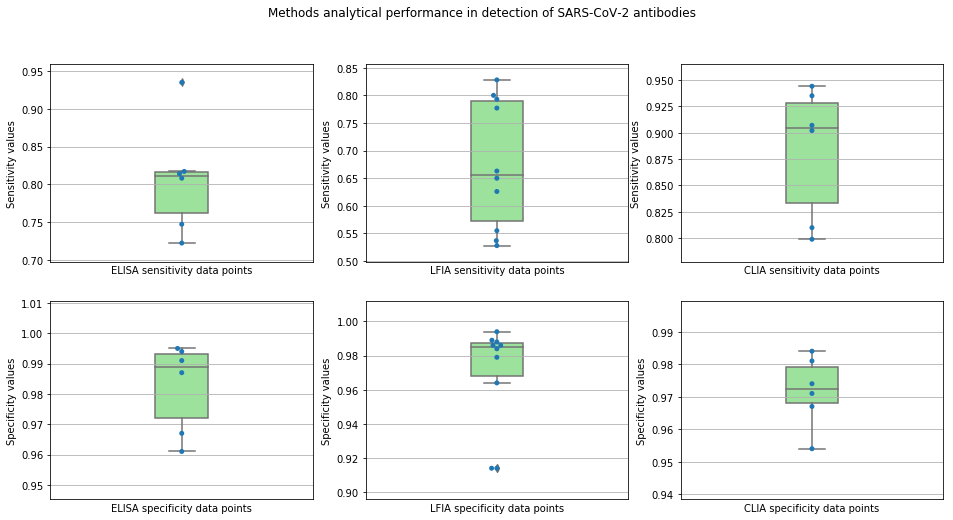

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

for dummy_i in range(3):
    ax[0][dummy_i].set_ylabel('Sensitivity values')
    ax[1][dummy_i].set_ylabel('Specificity values')
    ax[0][dummy_i].grid(), ax[1][dummy_i].grid()

elisa_sensitivities = sorted([float(elisa_data[0][dummy_i][0:5]) for dummy_i in range(0, 6)])
lfia_sensitivities = sorted([float(lfia_data[0][dummy_i][0:5]) for dummy_i in range(6, 16)])
clia_sensitivities = sorted([float(clia_data[0][dummy_i][0:5]) for dummy_i in range(16, 22)])
elisa_specificities = sorted([float(elisa_data[1][dummy_i][0:5]) for dummy_i in range(0, 6)])
lfia_specificities = sorted([float(lfia_data[1][dummy_i][0:5]) for dummy_i in range(6, 16)])
clia_specificities = sorted([float(clia_data[1][dummy_i][0:5]) for dummy_i in range(16, 22)])

sns.swarmplot(data=elisa_sensitivities, ax=ax[0, 0])
sns.boxplot(data=elisa_sensitivities, ax=ax[0, 0], width=0.2, color='lightgreen')
ax[0][0].set_xlabel('ELISA sensitivity data points')
ax[0][0].set_xticks(ticks=[])

sns.swarmplot(data=lfia_sensitivities, ax=ax[0, 1])
sns.boxplot(data=lfia_sensitivities, ax=ax[0, 1], width=0.2, color='lightgreen')
ax[0][1].set_xlabel('LFIA sensitivity data points')
ax[0][1].set_xticks(ticks=[])

sns.swarmplot(data=clia_sensitivities, ax=ax[0, 2])
sns.boxplot(data=clia_sensitivities, ax=ax[0, 2], width=0.2, color='lightgreen')
ax[0][2].set_xlabel('CLIA sensitivity data points')
ax[0][2].set_xticks(ticks=[])

sns.swarmplot(data=elisa_specificities, ax=ax[1, 0])
sns.boxplot(data=elisa_specificities, ax=ax[1, 0], width=0.2, color='lightgreen')
ax[1][0].set_xlabel('ELISA specificity data points')
ax[1][0].set_xticks(ticks=[])

sns.swarmplot(data=lfia_specificities, ax=ax[1, 1])
sns.boxplot(data=lfia_specificities, ax=ax[1, 1], width=0.2, color='lightgreen')
ax[1][1].set_xlabel('LFIA specificity data points')
ax[1][1].set_xticks(ticks=[])

sns.swarmplot(data=clia_specificities, ax=ax[1, 2])
sns.boxplot(data=clia_specificities, ax=ax[1, 2], width=0.2, color='lightgreen')
ax[1][2].set_xlabel('CLIA specificity data points')
ax[1][2].set_xticks(ticks=[])

fig.suptitle('Methods analytical performance in detection of SARS-CoV-2 antibodies')

#plt.tight_layout()
plt.show()